In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib notebook

In [4]:
iris = pd.read_csv('../data/iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_std = iris.copy()
iris_std[iris.columns[0:4]] = (iris[iris.columns[0:4]] - iris[iris.columns[0:4]].mean())/iris[iris.columns[0:4]].std()
iris_std.head()

,sepal length,sepal width,petal length,petal width,class
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa


In [14]:
# cov = iris_std.cov()
corr = iris_std.corr()
# Calculando autovalores e autovetores
va, ve = np.linalg.eig(corr)
# va, ve = np.linalg.eig(cov)
# Ordenando autovalores e autovetores
sort_idx = np.argsort(va)[::-1]
einvals = va[sort_idx]
einvecs = ve[sort_idx]
# plt.plot(np.cumsum(einvals), '-o')
# plt.show()
EVR = einvals/einvals.sum()
print('Variância de cada atributo do conjunto Iris')
pd.DataFrame(EVR.reshape((1,4)), ['Variância Iris'], columns=iris_std.columns[sort_idx])

Variância de cada atributo do conjunto Iris


,sepal length,sepal width,petal length,petal width
Variância Iris,0.727705,0.230305,0.036838,0.005152


In [16]:
print('Variância da soma dos atributos do conjunto Iris')
pd.DataFrame(np.cumsum(EVR).reshape((1,4)), ['Variância acumulada Iris'], columns=iris_std.columns[sort_idx])

Variância da soma dos atributos do conjunto Iris


,sepal length,sepal width,petal length,petal width
Variância acumulada Iris,0.727705,0.95801,0.994848,1.0


<IPython.core.display.Javascript object>


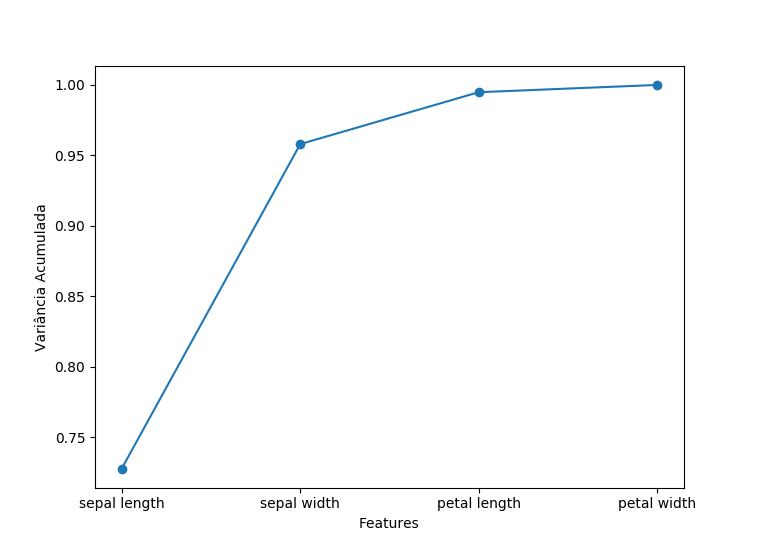

In [13]:
plt.plot(iris.columns[:-1][sort_idx], np.cumsum(EVR), '-o')
plt.xlabel('Features')
plt.ylabel('Variância Acumulada')
plt.show()

In [7]:
iris_pca = iris_std.copy()
x = iris_pca[iris_pca.columns[:-1]].values
iris_pca[iris_pca.columns.take(sort_idx)] = np.dot(x[:, sort_idx], einvecs)
iris_pca.head()

,sepal length,sepal width,petal length,petal width,class
0,-2.256981,-0.504015,-0.121536,0.022996,Iris-setosa
1,-2.079459,0.653216,-0.226492,0.102864,Iris-setosa
2,-2.360044,0.317414,0.051308,0.027732,Iris-setosa
3,-2.296504,0.573447,0.098530,-0.066090,Iris-setosa
4,-2.380802,-0.672514,0.021356,-0.037272,Iris-setosa


<IPython.core.display.Javascript object>


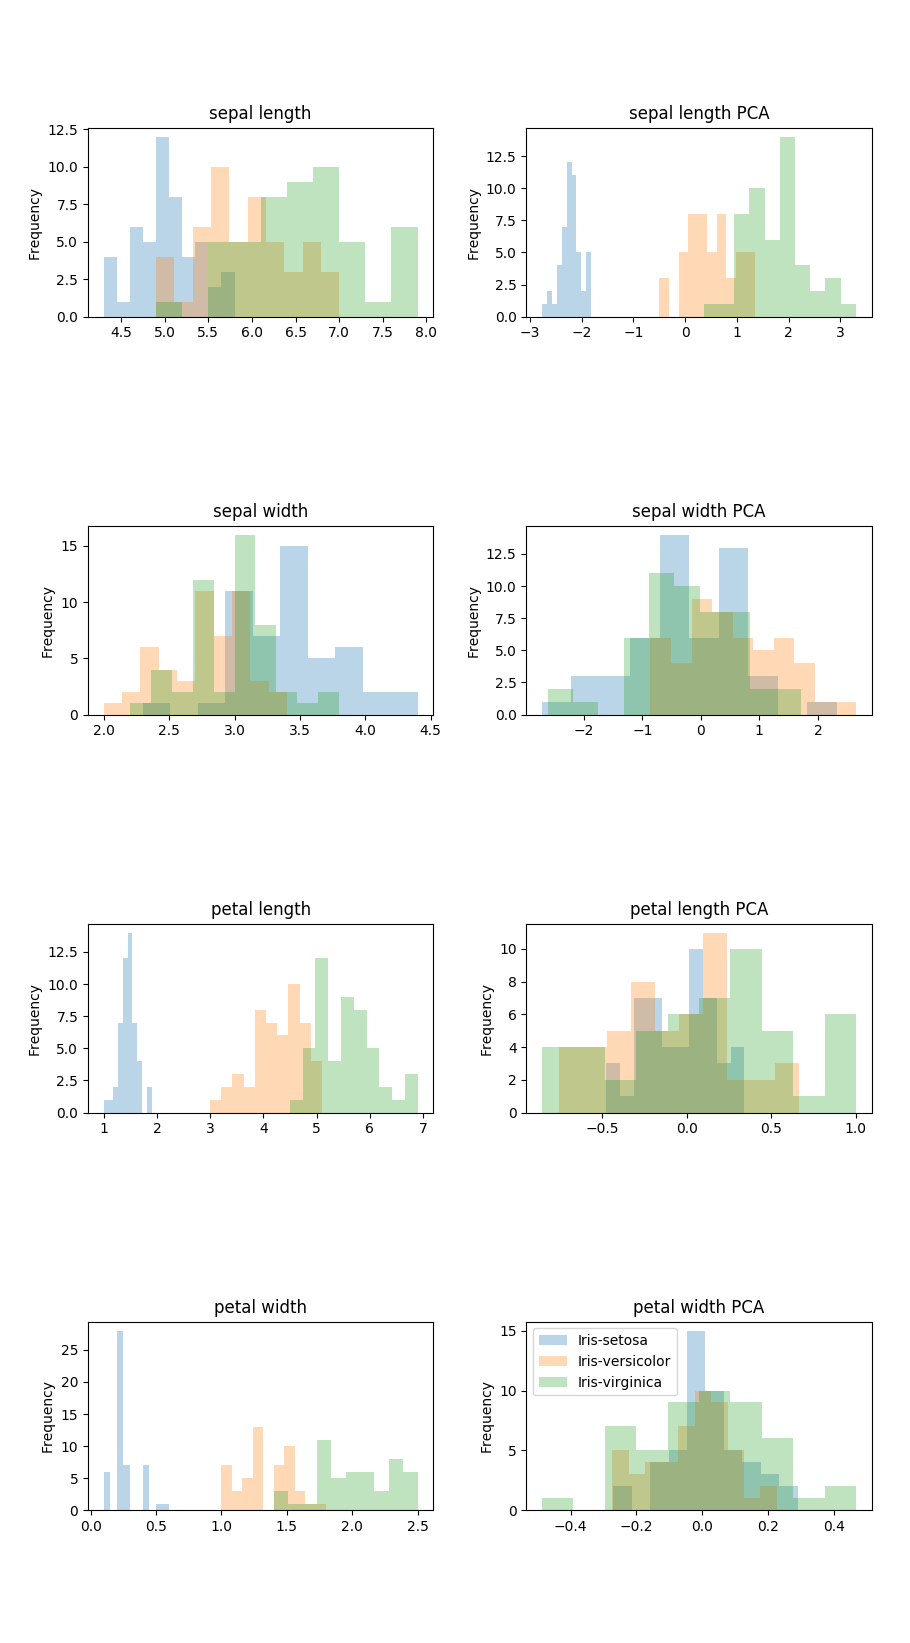

In [49]:
for i, j in zip(range(0, 2*len(iris.columns[:-1]), 2), range(len(iris.columns[:-1]))):
    plt.subplot(4, 2, i+1)
    col = iris.columns[j]
    plt.title(col)
    for c in iris['class'].unique():
        iris[iris['class'] == c][col].plot.hist(alpha=0.3)

    plt.subplot(4, 2, i+2)
    plt.title(col + ' PCA')
    for c in iris_pca['class'].unique():
        iris_pca[iris_pca['class'] == c][col].plot.hist(alpha=0.3)


plt.legend(iris['class'].unique())
        
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


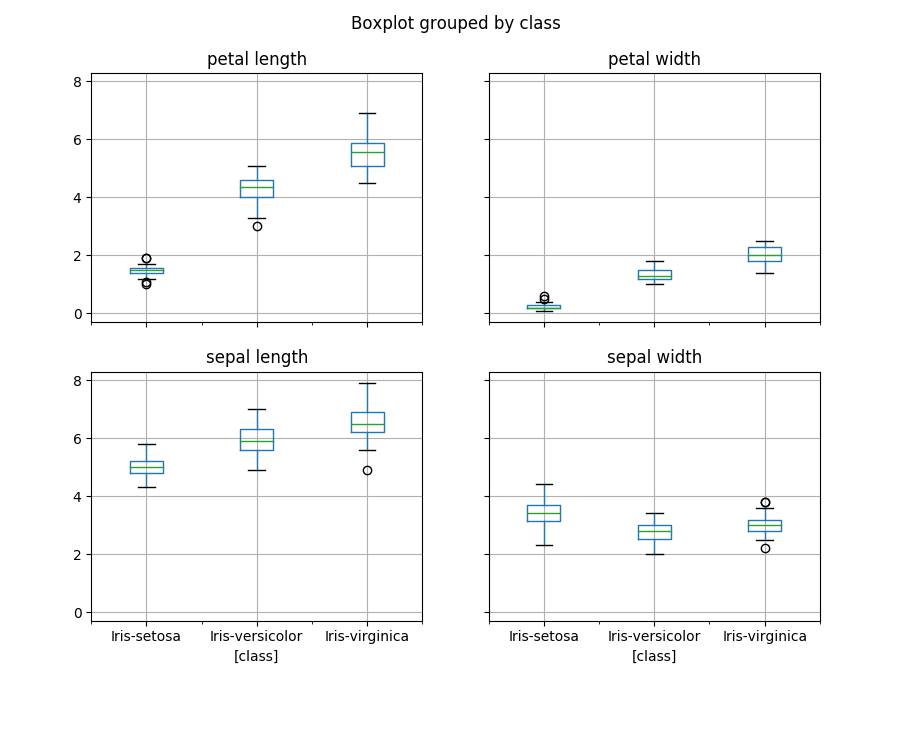

In [50]:
iris.boxplot(by='class')
plt.show()

<IPython.core.display.Javascript object>


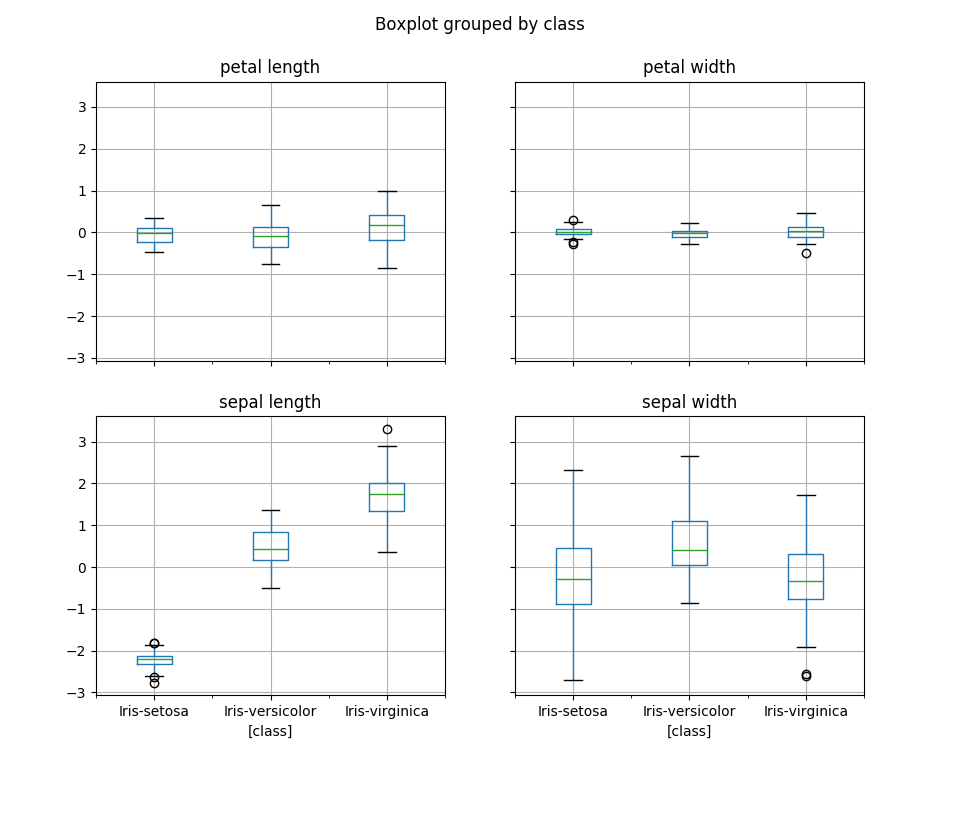

In [51]:
iris_pca.boxplot(by='class')
plt.show()

<IPython.core.display.Javascript object>


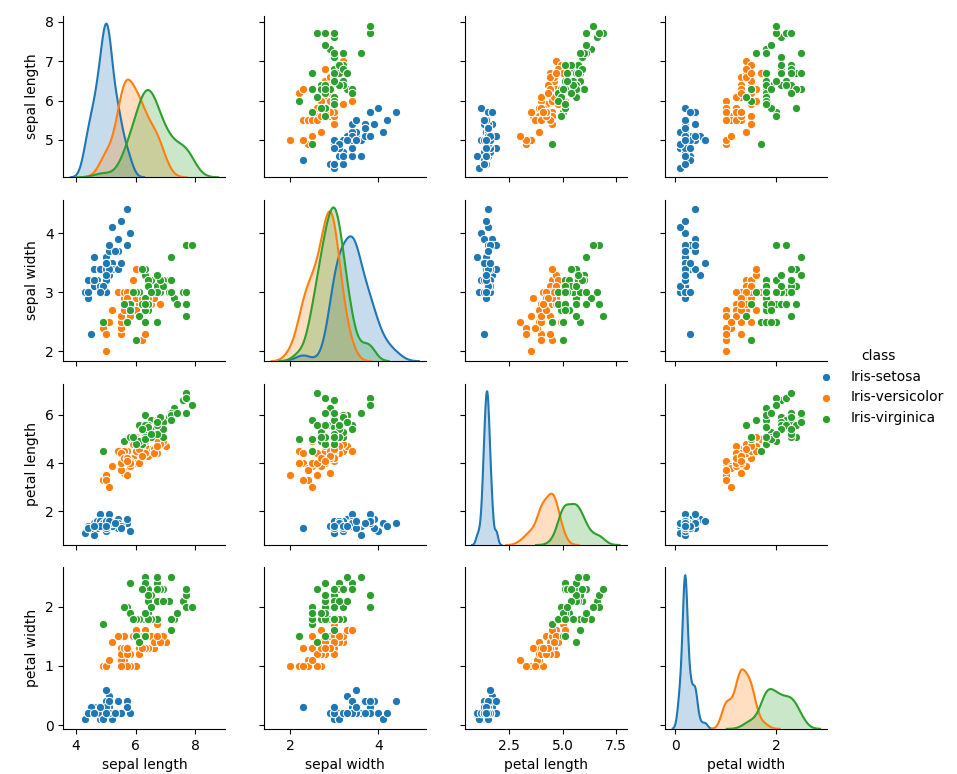

In [52]:
sns.pairplot(data=iris, hue='class')
plt.show()

<IPython.core.display.Javascript object>


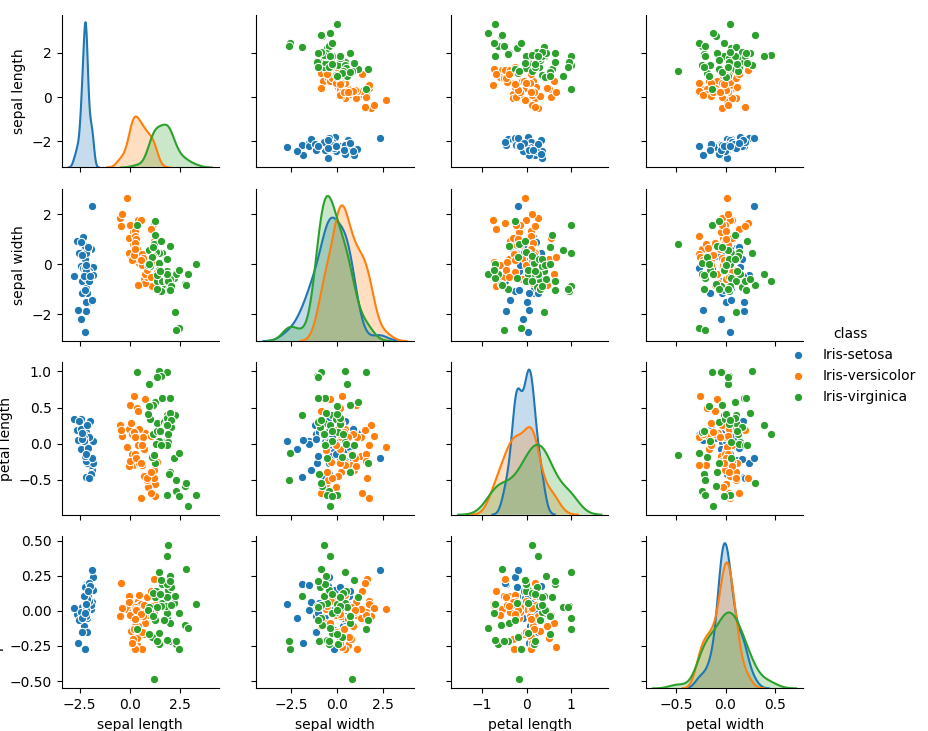

In [53]:
sns.pairplot(data=iris_pca, hue='class')
plt.show()

<IPython.core.display.Javascript object>


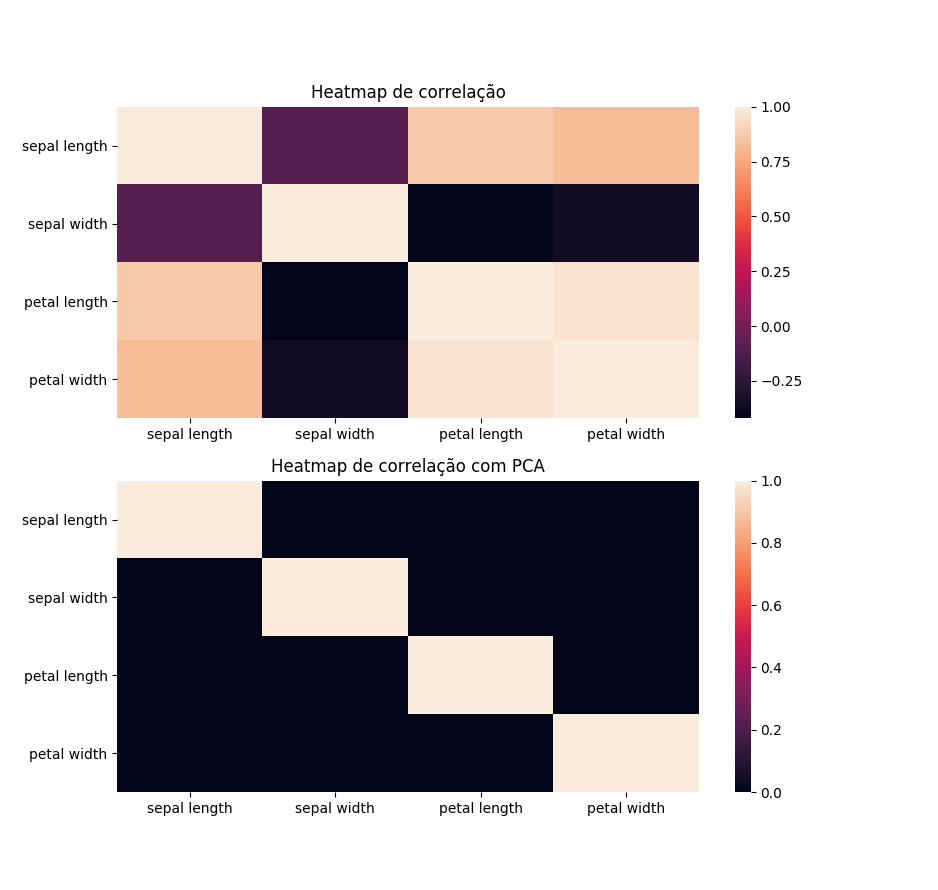

In [55]:
corr = iris.corr()
plt.subplot(2, 1, 1)
plt.title('Heatmap de correlação')
sns.heatmap(corr)

corr = iris_pca.corr()
plt.subplot(2, 1, 2)
plt.title('Heatmap de correlação com PCA')
sns.heatmap(corr)

plt.show()

<IPython.core.display.Javascript object>


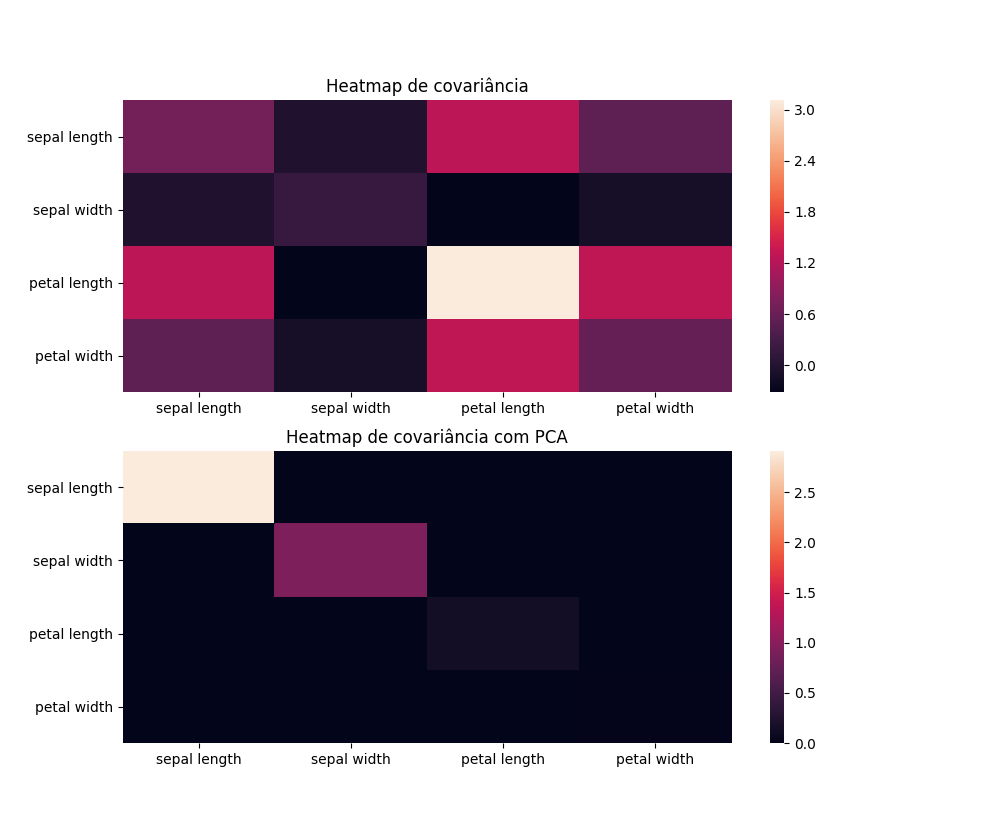

In [56]:
cov = iris.cov()
plt.subplot(2, 1, 1)
plt.title('Heatmap de covariância')
sns.heatmap(cov)

cov = iris_pca.cov()
plt.subplot(2, 1, 2)
plt.title('Heatmap de covariância com PCA')
sns.heatmap(cov)

plt.show()

<IPython.core.display.Javascript object>


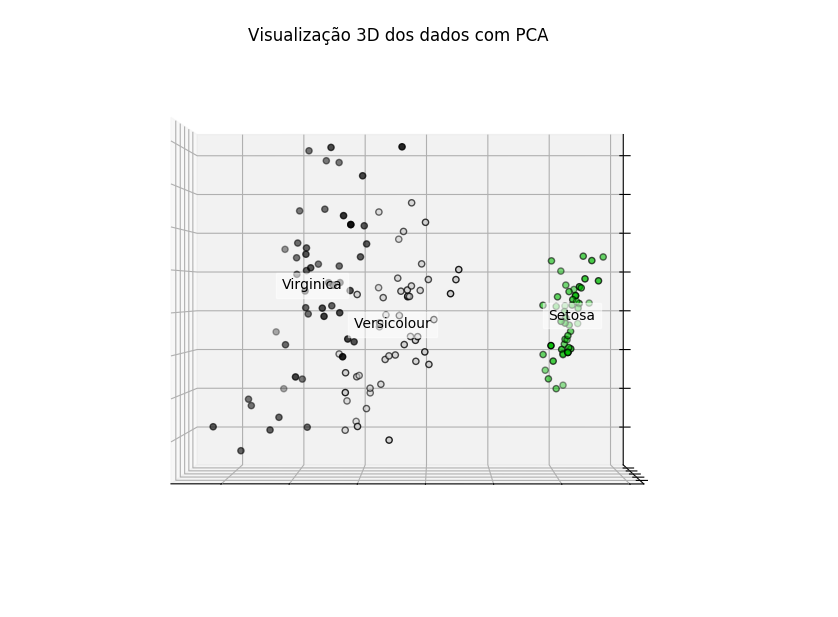

In [63]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
X = iris_pca[iris.columns[:-1]].values
y = iris_pca[iris.columns[-1]].copy()
for i in range(y.unique().size):
    y[y == y.unique()[i]] = i
y = y.values.astype(int)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plt.title('Visualização 3D dos dados com PCA')

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


<IPython.core.display.Javascript object>


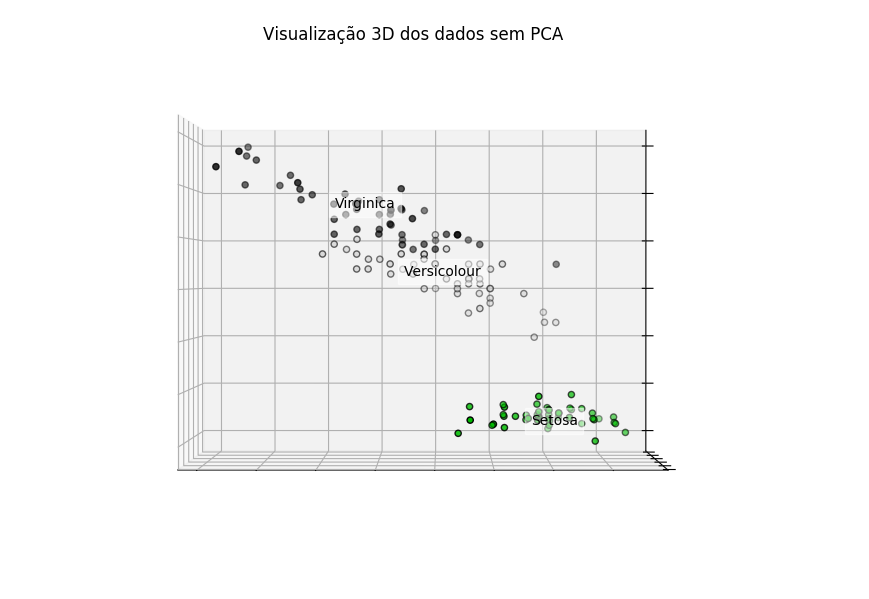

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = iris[iris.columns[:-1]].values
y = iris[iris.columns[-1]].copy()
for i in range(y.unique().size):
    y[y == y.unique()[i]] = i
y = y.values.astype(int)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
plt.title('Visualização 3D dos dados sem PCA')

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
